In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

from keras_tuner.tuners import RandomSearch

In [3]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f2/8c/35364a11b3e25f8e29a35420b0d18f65ec4f9d6d38e86a62d16ef998923c/pandas-2.1.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.8 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.0/10.8 MB 393.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/10.8 MB 393.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/10.8 MB 435.7 kB/s eta 0:00:2

In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached wrapt-1.15.0-cp39-cp39-win_amd64.whl (36 kB)
  Obtaining dependency information for werkzeug>=1.0.1 from https://files.pythonhosted.org/packages/9b/59/a7c32e3d8d0e546a206e0552a2c04444544f15c1da4a01df8938d20c6ffc/werkzeug-2.3.7-py3-none-any.whl.metadata
  Using cached werkzeug-2.3.7-py3-none-any.whl.metadata (4.1 kB)
  Obtaining dependency information for urllib3<2.0 from https://files.pythonhosted.org/packages/c5/05/c214b32d21c0b465506f95c4f28ccbcba15022e000b043b72b3df7728471/urllib3-1.26.16-py2.py3-none-any.whl.metadata
  Using cached urllib3-1.26.16-py2.py3-none-any.whl.metadata (48 kB)
  Obtaining dependency information for zipp>=0.5 from https://files.pythonhosted.org/packages/d9/66/48866fc6b158c81cc2bfecc04c480f105c6040e8b077bc54c634b4a67926/zipp-3.17.0-py3-none-any.whl.metadata
  Using cached pyasn1-0.5.0-py2.py3-none-any.whl (83 kB)
Using c

In [2]:
df = pd.read_csv('Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
df=df.dropna()
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [4]:
# Creation of feature set and target set
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
def hyper_tune(param):
    model = keras.Sequential() #designing ann
    #provide 2 to 20 layers as range (hidden layer)
    for i in range(param.Int('num_layers' ,2,20)): #param is the parameter, where
        #add the each layer
        #inside each layer no.of neurons which will happen in each layer
        model.add(layers.Dense(units=param.Int('units_'+str(i), #i is for no.of HL and giving name units_2 as the 1st itr
                                              min_value=32, #neurons min and max in the hidden layer
                                              max_value=512,
                                              step=32), #
                              activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    #learning rate param
    model.compile(
        optimizer=keras.optimizers.Adam(
            #param.choice means here we have to give the values like [1e-2 , 1e-3, 1e-4]
            param.Choice('learning_rate' , [1e-2 , 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error']) #reg model so no metric
    return model

In [6]:
tuner = RandomSearch(
    hyper_tune,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3, #totally 15 diffrent iterations
    directory='project',
    overwrite=True,
    project_name = 'Air Quality Index AQI'
)

In [7]:
tuner.search_space_summary()   #skip

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [9]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/1b/7c/66d34dc231a309cc3a7f3eeb848319be3b616fd2918db302aaef727eff4a/scikit_learn-1.3.1-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.1-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/23/86/57a03f715b1398c6c5efa5e62e34d683b6c4b609b0e51df58d48aedde84a/scipy-1.11.3-cp39-cp39-win_amd64.whl.metadata
  Using cached scipy-1.11.3-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca7

In [10]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=0)

In [11]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 06s]
val_mean_absolute_error: 50.80243682861328

Best val_mean_absolute_error So Far: 49.85433705647787
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit


Epoch 1/5
24/24 [==============================] - 1s 8ms/step - loss: 77.0566 - mean_absolute_error: 77.0566 - val_loss: 64.1405 - val_mean_absolute_error: 64.1405
Epoch 2/5
24/24 [==============================] - 0s 3ms/step - loss: 64.8901 - mean_absolute_error: 64.8901 - val_loss: 61.9057 - val_mean_absolute_error: 61.9057
Epoch 3/5
24/24 [==============================] - 0s 3ms/step - loss: 62.8632 - mean_absolute_error: 62.8632 - val_loss: 58.1260 - val_mean_absolute_error: 58.1260
Epoch 4/5
24/24 [==============================] - 0s 3ms/step - loss: 50.2138 - mean_absolute_error: 50.2138 - val_loss: 49.3457 - val_mean_absolute_error: 49.3457
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 45.8871 - mean_absolute_error: 45.8871 - val_loss: 47.7006 - val_mean_absolute_error: 47.7006


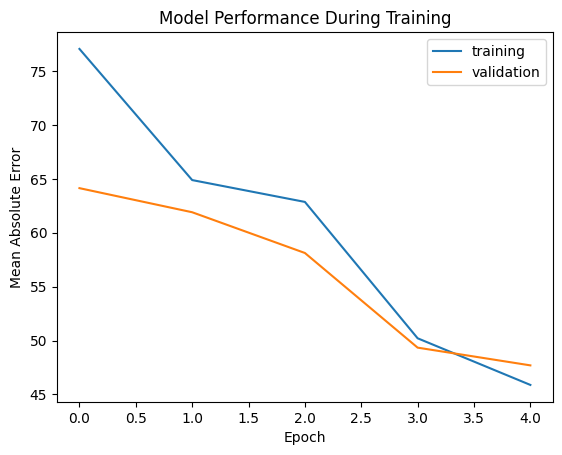

In [12]:
import matplotlib.pyplot as plt

#Get the best Hyperparameters found during the search
best_hps = tuner.get_best_hyperparameters(1)[0]

#Build the Model witht he best hyperparameters
model=hyper_tune(best_hps)

#Train the model with the best hyperparameters on the full training set
history = model.fit(x_train,y_train , epochs=5 ,validation_data = (x_test,y_test))

#Plot the Training and Validation Metrics for each Epoch
plt.plot(history.history['mean_absolute_error'] , label='training')
plt.plot(history.history['val_mean_absolute_error'] , label='validation')
plt.title('Model Performance During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()